In [122]:
# from moabb.datasets import PhysionetMI

In [123]:
# dataset= PhysionetMI()
# raw_mi=dataset.get_data(subjects=[1])

In [124]:
# raw_mi[1]['0']['0'].get_data()

In [125]:
# Step 1: Import necessary libraries
from moabb.datasets import Cattan2019_VR
from moabb.paradigms import P300
import matplotlib.pyplot as plt
import mne
import numpy as np

In [146]:
dataset= Cattan2019_VR()
raw = dataset.get_data(subjects=[2])
# raw[1]['1PC']['0block0rep0']

In [147]:
# Step 2: Define the dataset
dataset = Cattan2019_VR()

# Step 3: Define the paradigm (task)
# Motor Imagery paradigm is common in BCI research
paradigm = P300()

# Step 4: Fetch data for specific subjects
# You can specify subjects here; for now, we use two subjects as an example
subject_ids = dataset.subject_list[:1]
epochs, labels, metadata = paradigm.get_data(dataset=dataset, subjects=subject_ids, return_epochs=True)

/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 12 events (all good), 0 – 1 s (baseline off), ~790 kB, data loaded,
 'Target': 2
 'NonTarget': 10>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 12 events (all good), 0 – 1 s (baseline off), ~790 kB, data loaded,
 'Target': 2
 'NonTarget': 10>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 12 events (all good), 0 – 1 s (baseline off), ~790 kB, data loaded,
 'Target': 2
 'NonTarget': 10>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 12 events (all good), 0 – 1 s (baseline off), ~790 kB, data loaded,
 'Targ

Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding m

/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 12 events (all good), 0 – 1 s (baseline off), ~790 kB, data loaded,
 'Target': 2
 'NonTarget': 10>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/paradigms/base.py:350: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


In [148]:
easycap_montage = mne.channels.make_standard_montage("easycap-M1")

In [149]:
%matplotlib widget

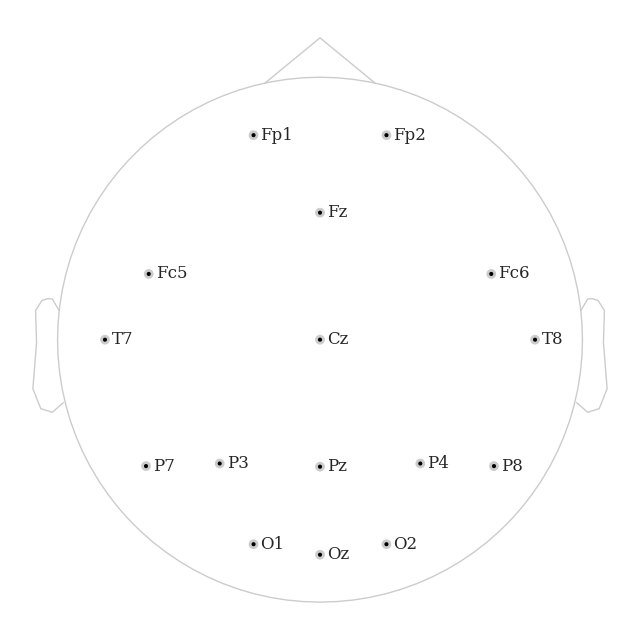

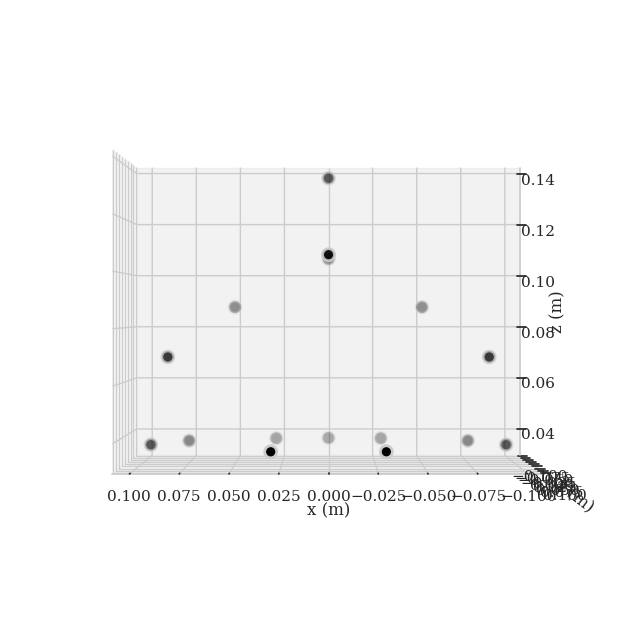

In [150]:
# Use the preloaded montage
epochs.set_montage(easycap_montage,on_missing='warn', match_case=False)
epochs.plot_sensors(show_names=True)
fig = epochs.plot_sensors("3d")


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/mne/viz/_mpl_figure.py:2355: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(FigureClass=FigureClass, **kwargs)


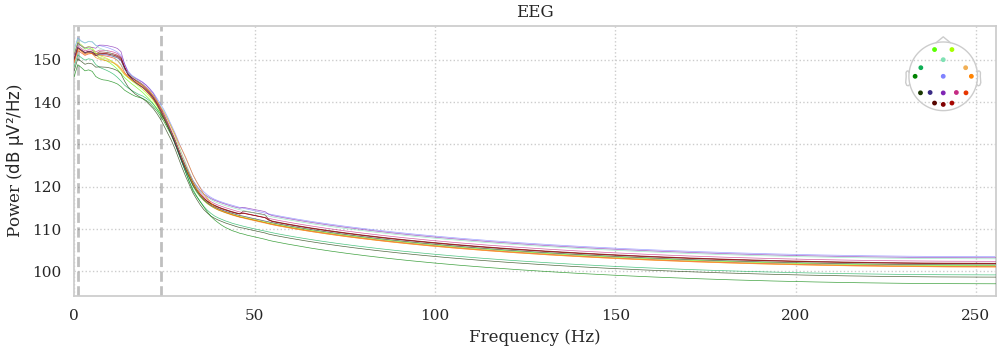

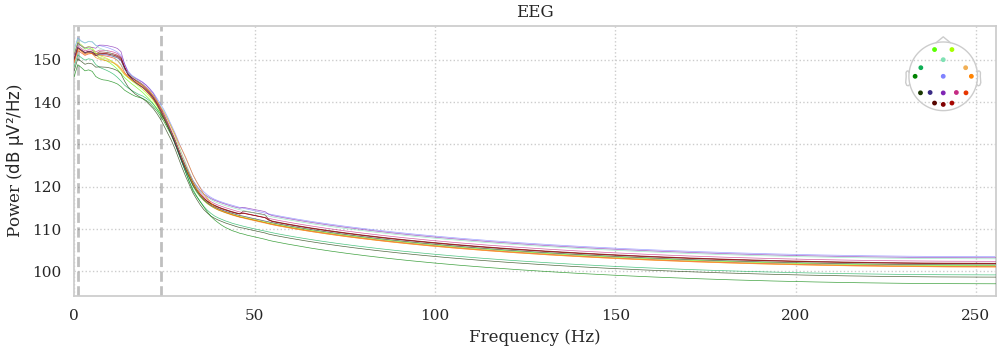

In [151]:
epochs.plot_psd();

In [152]:
epochs.get_data()[0] #data is in microvolt

array([[ 3.42245405,  3.16889912,  2.97100479, ..., -0.1193108 ,
        -0.49326817, -0.8293822 ],
       [-0.61419245, -0.50242476, -0.32173058, ...,  0.60962549,
         0.19232007, -0.20318232],
       [ 1.7973693 ,  1.41013928,  1.12978452, ..., -2.60869586,
        -2.59225789, -2.58833987],
       ...,
       [-2.94607419, -2.80066988, -2.58358221, ...,  8.21405187,
         7.76521632,  7.25272659],
       [-5.84516146, -5.60805874, -5.20178138, ...,  7.55051714,
         7.4380072 ,  7.33791582],
       [-6.70335933, -6.69306412, -6.47839642, ...,  6.47914831,
         6.33903317,  6.23840949]])

In [153]:
#reject epochs if a channel amplitude exceeds max value
reject_criteria = dict(eeg=100)  # 100 µV
epochs.drop_bad(reject=reject_criteria)

# import copy
# ep = copy.deepcopy(epochs)
# ep.drop_bad(reject=reject_criteria)

    Rejecting  epoch based on EEG : ['Fc6']
    Rejecting  epoch based on EEG : ['Fc6']
    Rejecting  epoch based on EEG : ['Fc6']
3 bad epochs dropped


<EpochsArray | 717 events (all good), 0 – 1 s (baseline off), ~44.9 MB, data loaded, with metadata,
 'Target': 120
 'NonTarget': 597>

In [158]:
len(epochs["Target"])

120

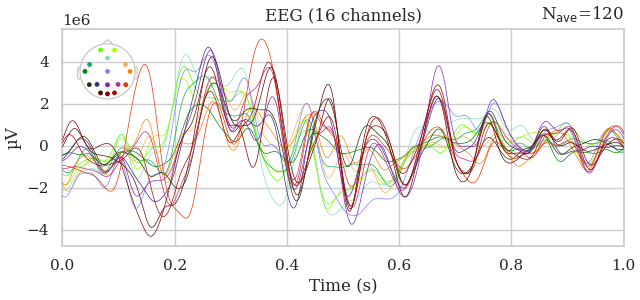

In [154]:
target = epochs["Target"].average()
fig1 = target.plot();

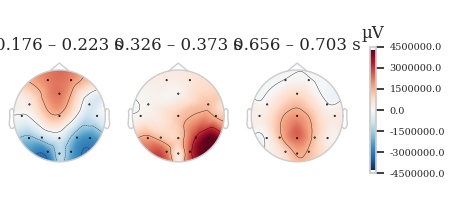

In [155]:
#display topomaps of the average evoked potential in 50 ms time windows centered at 200 ms, 350 ms, and 680 ms.
target.plot_topomap(times=[0.2, 0.35, 0.68], average=0.05);

No projector specified for this dataset. Please consider the method self.add_proj.


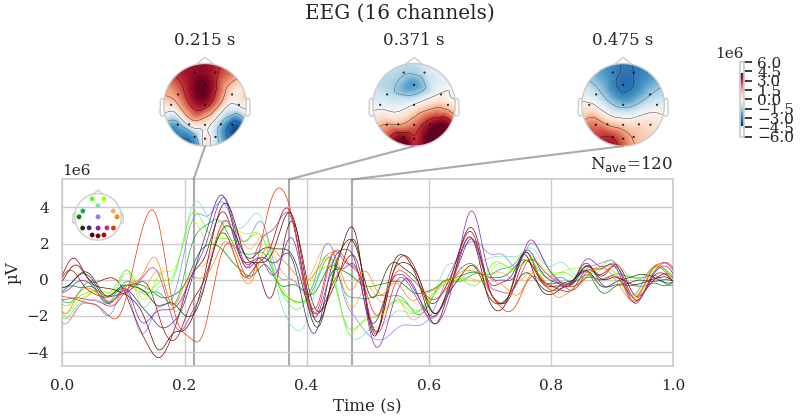

In [156]:
target.plot_joint();

[Text(0.5, 0, 'Time (ms)'),
 Text(0, 0.5, 'GFP (µV)'),
 Text(0.5, 1.0, 'Global Field Power')]

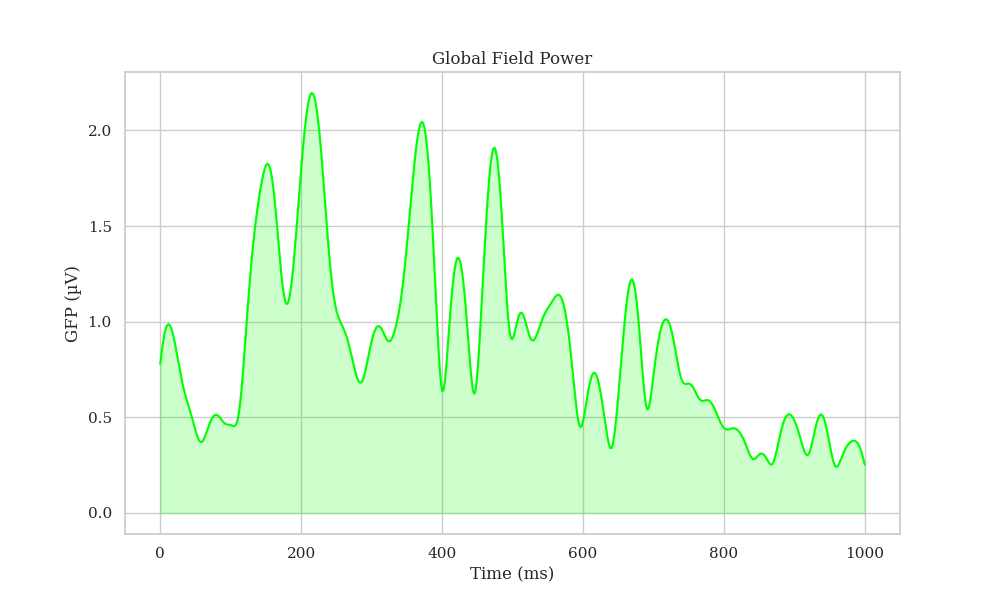

In [157]:
# Calculate Global Field Power and plot it with reference points
gfp = target.data.std(axis=0, ddof=0)

# Visualize GFP
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(target.times * 1000, gfp , color="lime")
ax.fill_between(target.times * 1000, gfp, color="lime", alpha=0.2)
ax.set(xlabel="Time (ms)", ylabel="GFP (µV)", title="Global Field Power")